In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import mitdeeplearning as mdl

In [5]:
sport = tf.constant("tennis", tf.string)
number = tf.constant(1.69696969696, tf.float64)

In [11]:
print(tf.rank(sport).numpy())
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))


0
`number` is a 0-d Tensor


In [12]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))
     

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [17]:
matrix = tf.constant([[1,2,3],[4,5,6],[7,8,9]], tf.int64)
assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [29]:
shape = [10,256,256,3]
images = tf.constant(tf.zeros(shape))

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3]

In [33]:
row_vec = matrix[1]
column_vec = matrix[:,1]
scalar = matrix[0, 2]

In [34]:

print("`row_vector`: {}".format(row_vec.numpy()))
print("`column_vector`: {}".format(column_vec.numpy()))
print("`scalar`: {}".format(scalar.numpy()))
     

`row_vector`: [4 5 6]
`column_vector`: [2 5 8]
`scalar`: 3


In [35]:
a = tf.constant(60)
b = tf.constant(9)

c1 = tf.add(a,b)
c2 = a + b

print(c1,c2)

tf.Tensor(69, shape=(), dtype=int32) tf.Tensor(69, shape=(), dtype=int32)


In [36]:
def func(a,b):
    c = a + b
    d = b - 1
    return c*d

In [38]:
func(1,6)

35

In [66]:
class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_op_nodes):
        super(DenseLayer, self).__init__()
        self.n_op_nodes = n_op_nodes
    
    def build(self, input_shape):
        d = int(input_shape[-1])
        self.W = self.add_weight("weight", shape= [d,self.n_op_nodes], dtype= "float32")
        self.B = self.add_weight("bias", shape = [1, self.n_op_nodes], dtype= "float32")
        
    def call(self, x):
        z = tf.matmul(x, self.W) + self.B
        y = tf.keras.activations.sigmoid(z)
        return y
    
    def get_weight(self):
        print(self.W)

In [73]:
tf.random.set_seed(1)
layer = DenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

In [74]:
layer.get_weight()

<tf.Variable 'weight:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.73366153,  0.8796015 ,  0.28695   ],
       [-0.14340228, -0.4558388 ,  0.3122064 ]], dtype=float32)>


In [65]:
mdl.lab1.test_custom_dense_layer_output(y)


[PASS] test_custom_dense_layer_output


True

In [116]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense

In [ ]:
"""

### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = # TODO

# Add the dense layer to the model
model.add(dense_layer)
"""

In [110]:
n_op_nodes = 3

model = Sequential()
model.add(tf.keras.layers.Dense(n_op_nodes, activation= 'sigmoid'))




In [111]:
model.input_shape

AttributeError: 'Sequential' object has no attribute '_nested_inputs'

In [107]:
x_input = tf.constant([[1,2.]])

In [114]:
op = model(x_input)

In [115]:
op

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.2069671, 0.868585 , 0.8226104]], dtype=float32)>

In [118]:
class SubClassModel(tf.keras.Model):
    
    def __init__(self, n_op_nodes):
        super(SubClassModel, self).__init__()
        d = tf.keras.layers.Dense(n_op_nodes,activation='sigmoid')
        self.dense_layer = d
    
    def call(self, inputs):
        return self.dense_layer(inputs)

In [120]:
n_output_nodes = 3
model = SubClassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.16725184 0.11764057 0.44440642]], shape=(1, 3), dtype=float32)


In [124]:
class IdentityModel(tf.keras.Model):
    def __init__(self, n_op_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_op_nodes, activation="sigmoid")
    
    def call(self, inputs, is_identity=False):
        x = self.dense_layer(inputs)
        return x if is_identity == False else inputs

In [125]:

n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input, is_identity=False)
out_identity = model.call(x_input, is_identity=True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.13892046 0.20031624 0.7598267 ]]; network identity output: [[1. 2.]]


In [141]:
x = tf.Variable(3.0)


with tf.GradientTape() as tape:
    y = x*x

dy_dx = tape.gradient(y,x)



In [142]:
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


Text(0, 0.5, 'x value')

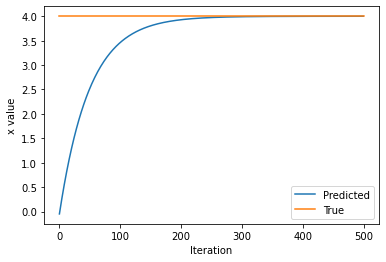

In [154]:
x = tf.Variable([tf.random.normal([1])])

learning_rate = 1e-2
history = []

x_f = 4

for i in range(500):
    with tf.GradientTape() as tape:
        l = (x - x_f)**2
    
    grad = tape.gradient(l,x)
    new_x = x - learning_rate*grad
    x.assign(new_x)
    history.append(x.numpy()[0])
    
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

In [155]:
print(x.numpy())

[[3.9998307]]


In [156]:
print(x.numpy())

[[3.9998307]]
